In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Evaluating our models (Regression)

In [31]:
"""
Lets load an train a regression model so we can understand how we can
better measure our model's performance
"""
from sklearn.datasets import load_boston
boston = load_boston()

data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
data['target'] = pd.Series(boston['target'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
# Let's Split into fatures and labels
x = data.drop("target", axis=1)
y = data['target']

In [33]:
# Training and Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [34]:
# We will use an ensemble model as we already know it performs fairly well
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.8600856510093358

## Regression Evaluation Metrics

1. R²/ Coefficient of Determination
2. Mean Absolute Error
3. Mean Squaredf Error

$R^2$ is a measure of how much of the variance in our target value is explained by our model, it values range between $-\infty$ and 1 and it is computed as 

$$R^2 = 1 - \frac{SS_{tot}}{SS_{res}}$$

Where

$$SS_{tot} = \Sigma_{i=1}^n (y_i-\bar y)^2$$

And

$$SS_{res} = \Sigma_{i=1}^n (y_i-\hat y_i)^2$$

With $y_i$ being the true value, $\bar y$ the average of the true values and $\hat y_i$ the model prediction

In [43]:
preds = rfr.predict(x_test)
rfr.score(x_test, y_test)

0.8600856510093358

In [46]:
# We can also use sklearn.metrics functions to compute all of our metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
preds = rfr.predict(x_test)
r2_score(y_test, preds)

0.8600856510093358

The Mean Absolute Error (MAE) is computed as the average of the absolute difference between the model predicitons and the true values

$$\Sigma_{i=1}^{n} \frac{|\hat{y_i} - y_i|}{n}$$

In [47]:
mean_absolute_error(y_test, preds)

2.391205882352942

This means that, on average, our predictions are differ from the actual value by 2.39 units in either direction.

At last, we have the Mean Squared Error (MSE) which is really similar to the MAE

$$\Sigma_{i=1}^n=\frac{(\hat y_i - y_i)^2}{n}$$

In [53]:
mean_squared_error(y_test, preds)

11.155883284313726

Which puts our model's prediction at, on average 11.15 units$^2$ off of the real value.
Note that the unit is squared, so a better measurement would be to then take the root of the MSE.

In [55]:
mean_squared_error(y_test, preds)**(1/2)

3.340042407562174

This raises the question: should I use MAE ou MSE? It depends, if the cost of being wrong is linear on how worng you are, ie: being off by 10 is twice as bad as being off by 5, then you should use MAE, bu if being off by 10 is more than twice as bad as being off by 5, then use MSE

## Evaluating our model (Classification)

In [7]:
heart_disease = pd.read_csv("resources/heart-disease.csv")
heart_disease.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0


In [8]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
"""
Other than sklearn builtin scoreing functions, we can also use the .score() method of teh estimator we are
fitting to our data
"""
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8360655737704918

In [10]:
"""
We can also use the scoring parameter if we are using a Cross Validation 
trategy to evaluate our model
""";

## Cross Validation

In [11]:
"""
Cross validation is a technique that involves training a model with the same hyperparameters
with different training and test data and then averaging their scores, this is done as a way to
infer which set of hyperparameters is better for a given problem, training multiple models
may be seen as sampling from a random distribution of score values that is parametrized by the 
hyperparameters themselves
"""
from sklearn.model_selection import cross_val_score

"""
The cross_val_method takes our full data and splits it into training and testing data internally
it then trains a given number of models and returns an array with each model's score, the scoring
metric is defined with the scoring parameter
"""
scores = cross_val_score(rfc, x, y, scoring="accuracy", cv=10)
scores, scores.mean()

(array([0.90322581, 0.83870968, 0.87096774, 0.93333333, 0.86666667,
        0.83333333, 0.73333333, 0.86666667, 0.73333333, 0.83333333]),
 0.8412903225806451)

As we can see the average accuracy that our model will achieve is around 83.1% with those hyperparameters
Lets look at some different metrics we can use for classification models:
1. Accuracy
2. AUC/ROC Curve
3. Confusion Matrix
4. Classification Report

### Accuracy

Accuracy is the ratio of true positives you get from your model, there are some times where this is not a good metric, for instance, lets say we are training a model to detect a very rary disease ta occurs in only 0.1% of the population, if we always say that a given person has that disease we have a 99.9% Accuracy model, but it is not very useful since it will never predict if someone does have the disease

### AUC/ROC Curve
The Area Under the Receiver Operating Characteristic Curve (ROC Curve) comapres the ratio between True positives and False Positives

In [12]:
# The roc_curve method receives the ground truths and the probability that each sample 
# is calssified as true (thus the slicing on the predict_proba return value)
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
fpr, tpr, tresholds 

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03703704,
        0.03703704, 0.03703704, 0.11111111, 0.11111111, 0.14814815,
        0.14814815, 0.22222222, 0.33333333, 0.33333333, 0.40740741,
        0.44444444, 0.59259259, 0.59259259, 0.7037037 , 0.81481481,
        1.        ]),
 array([0.        , 0.02941176, 0.08823529, 0.14705882, 0.26470588,
        0.35294118, 0.41176471, 0.47058824, 0.5       , 0.52941176,
        0.55882353, 0.64705882, 0.64705882, 0.79411765, 0.82352941,
        0.91176471, 0.91176471, 0.91176471, 0.94117647, 0.94117647,
        0.97058824, 0.97058824, 1.        , 1.        , 1.        ,
        1.        ]),
 array([1.99, 0.99, 0.96, 0.94, 0.88, 0.87, 0.85, 0.83, 0.82, 0.78, 0.74,
        0.72, 0.69, 0.52, 0.51, 0.47, 0.46, 0.35, 0.31, 0.28, 0.24, 0.21,
        0.19, 0.11, 0.09, 0.01]))

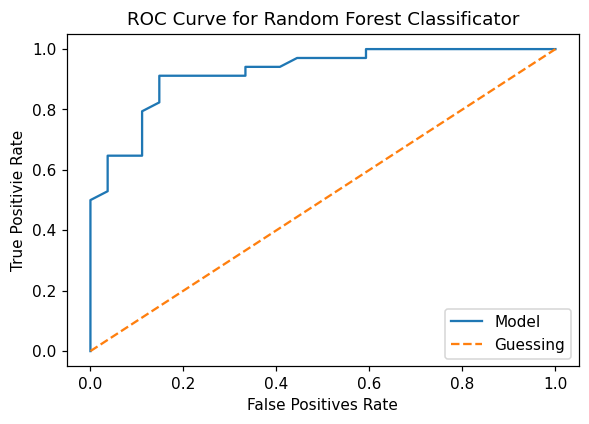

In [56]:
fig, ax = plt.subplots(dpi=110)
ax.plot(fpr, tpr, label="Model")
ax.plot([0,1], [0,1], linestyle='--', label="Guessing")
ax.legend()
ax.set(title="ROC Curve for Random Forest Classificator",
      xlabel = "False Positives Rate",
      ylabel = "True Positivie Rate");

In [14]:
# We also have a roc_auc_score function
roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])

0.9221132897603486

## The Confusion Matrix

A Confusion matrix compares the ground truth wit hthe predicted labels and is repesented as a table

               
                
True\Predicted  1   |   0

1...............TP  |  FN

0...............FP  |  TN

TP = True Positive

FN = False Negative

FP = False Positive

TN = True Negative

In [15]:
# A Confusion matrix allows us to look at all the ratios at once
confusion = pd.crosstab(y_test, rfc.predict(x_test), 
                         rownames=["Actual Labels"], 
                         colnames=["Predicted"])
confusion

Predicted,0,1
Actual Labels,,
0,23,4
1,6,28


In [16]:
"""
In this example we have 19 True Negatives, 7 false Positives, 5 false negatives and 30 true positves
We can also use sklearns method to compute the confusion matrix
Note: you can find more aboute Confusion matrix here : https://en.wikipedia.org/wiki/Confusion_matrix
"""
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc.predict(x_test))

array([[23,  4],
       [ 6, 28]])

In [17]:
"""
Finally, sklearn has a classification report utility with a lot of metrics that you may want
"""
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [18]:
"""
If we want a machine ready output we can pass output_dict=True
"""
classification_report(y_test, rfc.predict(x_test), output_dict=True)

{'0': {'precision': 0.7931034482758621,
  'recall': 0.8518518518518519,
  'f1-score': 0.8214285714285715,
  'support': 27},
 '1': {'precision': 0.875,
  'recall': 0.8235294117647058,
  'f1-score': 0.8484848484848485,
  'support': 34},
 'accuracy': 0.8360655737704918,
 'macro avg': {'precision': 0.834051724137931,
  'recall': 0.8376906318082789,
  'f1-score': 0.83495670995671,
  'support': 61},
 'weighted avg': {'precision': 0.8387507066139062,
  'recall': 0.8360655737704918,
  'f1-score': 0.8365091192960045,
  'support': 61}}